#Curso Muestreo Estadístico
##Introducción al Muestreo
Junio 2025
adominguez@utb.edu.co

# Simulación del Teorema del Límite Central (TLC) y Error Estándar
Este notebook muestra cómo funciona el Teorema del Límite Central usando simulaciones con una población no normal.
Además, se calcula y visualiza el error estándar teórico y empírico para diferentes tamaños de muestra.


## 📘 Teoría del Teorema del Límite Central (TLC)

El **Teorema del Límite Central (TLC)** establece que:



Si $ X_1, X_2, \ldots, X_n $ son variables aleatorias independientes e idénticamente distribuidas (i.i.d.), con media $ \mu$ y varianza $ \sigma^2 $, entonces la distribución de la media muestral $ \bar{X}_n $ tiende a una distribución normal cuando \( n \) es suficientemente grande:




$$
\bar{X}_n = \frac{1}{n}\sum_{i=1}^n X_i \approx N\left(\mu, \frac{\sigma^2}{n}\right)
$$

Esto justifica el uso de métodos de inferencia basados en la normalidad, incluso cuando la población original no es normal, **si el tamaño de la muestra es suficientemente grande**.

---

## 📐 Cálculo del Error Estándar

El **error estándar (EE)** de un estimador es la desviación estándar de su distribución muestral. En el caso de la media muestral \( \bar{X} \), el error estándar teórico es:

$$
EE_{\text{teórico}}(\bar{X}) = \frac{\sigma}{\sqrt{n}}
$$

donde $ \sigma $ es la desviación estándar poblacional y \( n \) el tamaño de la muestra.

El **error estándar empírico** se estima como la desviación estándar de las medias muestrales obtenidas por simulación:

$$
EE_{\text{empírico}}(\bar{X}) = SD(\bar{X}_1, \bar{X}_2, \ldots, \bar{X}_{1000})
$$

Esto permite validar en la práctica la aproximación teórica que predice el TLC.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style='whitegrid')
np.random.seed(42)

## Generación de la población

In [2]:
# Población con distribución exponencial
population = np.random.exponential(scale=50, size=100000)
mu_population = np.mean(population)
sigma_population = np.std(population)
print(f'Media poblacional: {mu_population:.2f}')
print(f'Desviación estándar poblacional: {sigma_population:.2f}')

Media poblacional: 49.80
Desviación estándar poblacional: 49.65


## Simulación del Teorema del Límite Central

In [3]:
sample_sizes = [5, 30, 100]
n_simulations = 1000
results = {}

for n in sample_sizes:
    sample_means = []
    for _ in range(n_simulations):
        sample = np.random.choice(population, size=n, replace=False)
        sample_means.append(np.mean(sample))
    results[n] = sample_means

# Convertir a DataFrame
df = pd.DataFrame(dict([(f'n={n}', pd.Series(v)) for n, v in results.items()]))

## Visualización de la distribución de medias muestrales

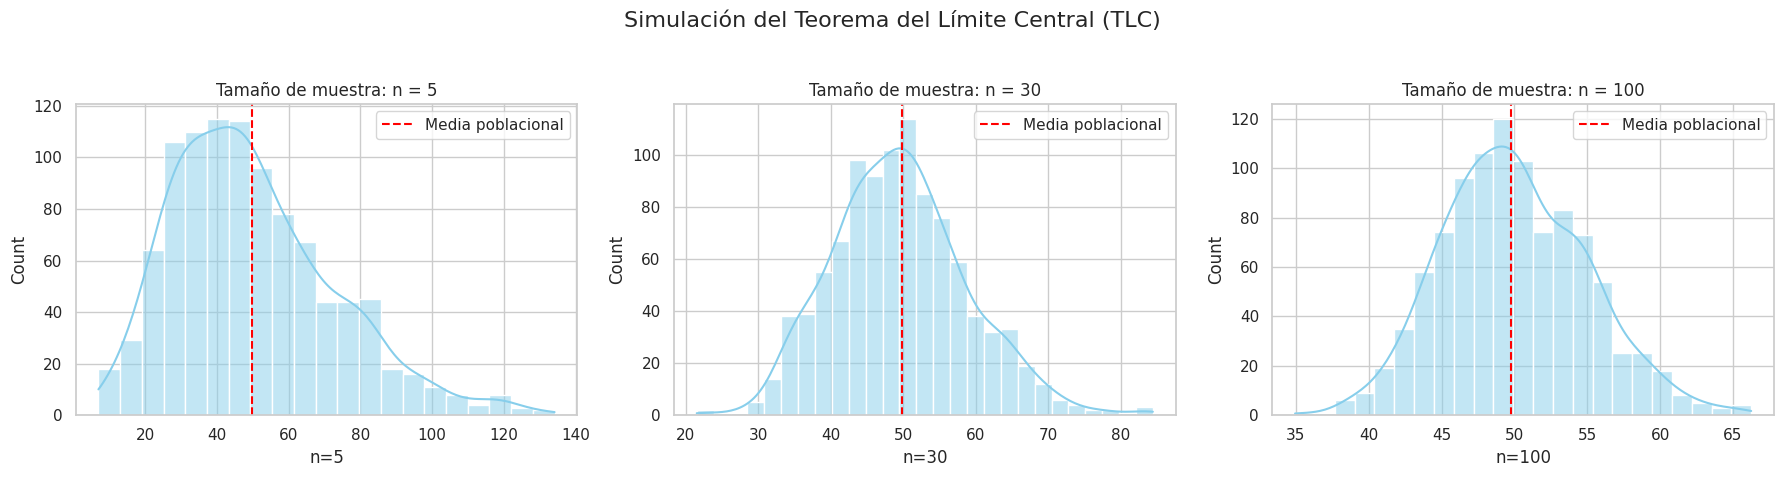

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, n in enumerate(sample_sizes):
    sns.histplot(df[f'n={n}'], kde=True, ax=axes[i], color='skyblue')
    axes[i].axvline(mu_population, color='red', linestyle='--', label='Media poblacional')
    axes[i].set_title(f'Tamaño de muestra: n = {n}')
    axes[i].legend()

plt.suptitle('Simulación del Teorema del Límite Central (TLC)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Cálculo del Error Estándar

In [5]:
error_std_df = pd.DataFrame({
    'n': sample_sizes,
    'Error Estándar Teórico': [sigma_population / np.sqrt(n) for n in sample_sizes],
    'Error Estándar Empírico': [np.std(results[n]) for n in sample_sizes]
})
error_std_df

,n,Error Estándar Teórico,Error Estándar Empírico
0,5,22.203463,22.756669
1,30,9.064526,9.276698
2,100,4.964845,4.956782


## Conclusión
- A medida que el tamaño de muestra aumenta, la distribución de la media muestral se aproxima a una normal.
- El error estándar disminuye con muestras más grandes.
- El Teorema del Límite Central es clave para justificar el uso de inferencia estadística con muestras aleatorias.


## 🧠 Actividad: Explorando el TLC con otras distribuciones
Ahora que has comprendido cómo el Teorema del Límite Central funciona con una **población no normal (exponencial)**, te proponemos aplicar el mismo procedimiento con otras distribuciones.

### 🔍 Tu reto:

1. Cambia la distribución de la población a alguna de las siguientes:
   - Distribución **uniforme**: `np.random.uniform(low=0, high=100, size=100000)`
   - Distribución **binomial**: `np.random.binomial(n=10, p=0.4, size=100000)`
   - Distribución **normal asimétrica** (log-normal): `np.random.lognormal(mean=3.5, sigma=0.5, size=100000)`

2. Repite la simulación:
   - Calcula la media poblacional y su desviación estándar.
   - Genera las medias muestrales para tamaños `n = 5`, `30` y `100`.
   - Visualiza los histogramas y compara las distribuciones de las medias muestrales.
   - Calcula el **error estándar teórico** y **empírico**.

3. Reflexiona:
   - ¿Qué sucede con la forma de la distribución de las medias a medida que el tamaño muestral aumenta?
   - ¿El TLC se cumple incluso cuando la población original no es normal?

📝 Puedes anotar tus conclusiones en una celda Markdown al final del notebook.
